In [36]:
#import statements

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#place holder for sklearn
%matplotlib inline

In [37]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [38]:
df_test['Survived'] = 'N/A'

df_train['Data_Type'] = 'train'
df_test['Data_Type'] = 'test'

In [39]:
# join the two data frames
df_master = pd.concat([df_test, df_train])

#any cleaning/feature engineering applied to the training data, can also be applied to the test data
#and quickly filter it via the "Data_Type" column`

In [40]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Data_Type
118,1010,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,N/A,test
216,1108,3,"Mahon, Miss. Bridget Delia",female,NaN,0,0,330924,7.8792,NaN,Q,N/A,test
94,986,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,N/A,test
66,958,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q,N/A,test
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,G6,S,N/A,test


In [41]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Data_Type      891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Quick observations:
* have all data except age (missing 177 observations) and cabin info
* average age is around 30
* paid 32 dollars for the ticket
* SibSp = .5 (means half of people tended to have a sibling/spouse on board) 
* ParCh = .38 (little less than half were traveling with children

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2DAAEC88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CE2DC5E940>]], dtype=object)

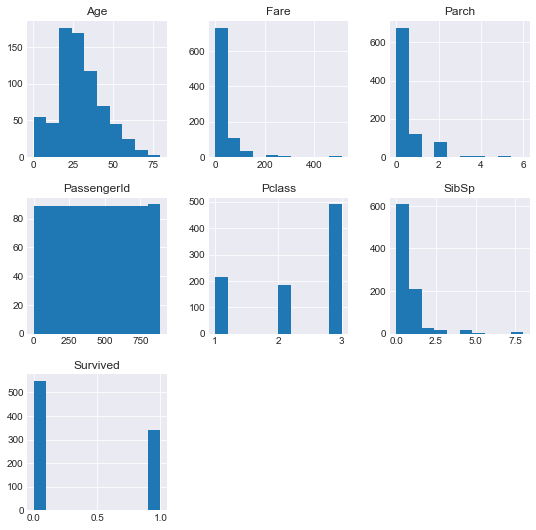

In [43]:
plt.style.use('seaborn-dark')
df_train.hist(figsize = (9,9))

In [44]:
df_train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [45]:
df_train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [46]:
df_train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

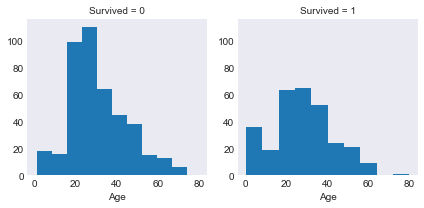

In [47]:
g = sns.FacetGrid(df_train, col = 'Survived')
g.map(plt.hist, 'Age')

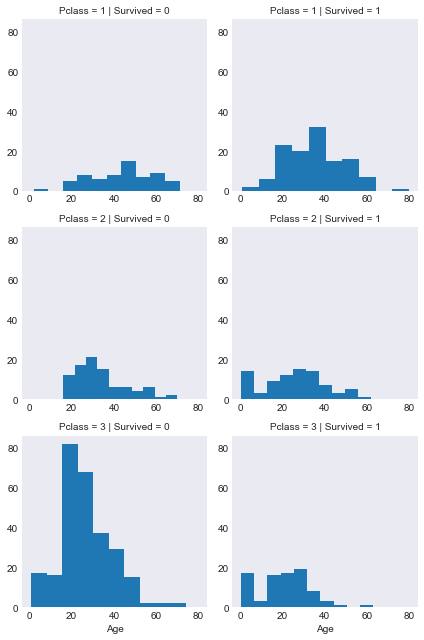

In [48]:
g = sns.FacetGrid(df_train, col = 'Survived' , row = 'Pclass')
g.map(plt.hist, 'Age')